#  <span style="text-align=center; color:DarkMagenta; font-family:Georgia; font-size:1.2em;"> **_M2 - TP EIAH - Indicateurs_** </span>

Eliot Lepoittevin & Benjamin Riviere - Groupe 2

Les indicateurs présentés dans ce rapport sont à destination d'un professeur qui souhaite mesurer la performance d'un élève.

Les indicateurs choisis sont :
- La réactivité (mesure du temps de réaction d'un élève sur le système)
- La motivation (calcul de la "motivation" d'un élève)

Ici nos indicateurs sont affichés par utilisateur et sont donc à comparer entre plusieurs élèves.\
*nécessite le fichier 'transition.csv' dans le même dossier.

# <span style="color:brown; font-family:times; font-size:1.3em;">Code</span>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import datetime

In [2]:
# Collecte les données par utilisateur, demande un dataframe de données et la position du nom de l'utilisateur
def LoadPerUserData(dataframe, userNamePos):
    userData = {}
    data = dataframe.values
    
    for i in range(len(data)):
        username = data[i][userNamePos]
        
        if(userData.get(username) == None):
            userData[username] = []
        userData[username].append(data[i])

    return userData

In [3]:
# Créer un indicateur pour un utilisateur (dictionnaire de différentes données utiles ou données calculées)

# Indicateur sur la réactivité
def GetReactivityIndicator(userData):
    totalAction=0
    totalDelay=0

    totalAnswerMessageTime = 0
    totalAnswerMessage = 0
    
    totalOpeningNewContentTime=0
    totalOpeningNewContent=0
    
    totalPostNewMessageTime=0
    totalPostNewMessage=0
    
    for d in userData:
        if(pd.isnull(d[6])==False):
            time = d[6].split(':')
            delay=float(time[0])*3600+float(time[1])*60+float(time[2])
            totalDelay+=delay
            totalAction+=1
            if(d[2] == "Répondre à un message"):
                totalAnswerMessageTime+=delay
                totalAnswerMessage+=1
            if(d[2] == "Afficher le contenu d'un message"):
                totalOpeningNewContentTime+= delay
                totalOpeningNewContent+=1
            if(d[2] == "Poster un nouveau message"):
                totalPostNewMessageTime+= delay
                totalPostNewMessage+=1
                
    indicator = {}
    
    if(totalAction!=0):
        indicator['AverageDelayTime(in sec)']=totalDelay/totalAction
    if(totalAnswerMessage!=0):
        indicator['AverageDelayAnswerMessage(in sec)']=totalAnswerMessageTime/totalAnswerMessage
    if(totalOpeningNewContent!=0):    
        indicator['AverageDelayOpeningNewContent(in sec)']=totalOpeningNewContentTime/totalOpeningNewContent
    if(totalPostNewMessage!=0):    
        indicator['AverageDelayPostNewMessage(in sec)']=totalPostNewMessageTime/totalPostNewMessage
    
    return indicator


# Indicateur sur la motivation
def GetMotivationIndicator(userData):
    
    nb_connexions = 0 
    active_actions = 0
    passive_actions = 0        
    
    for i in range(0, len(userData)):
            
        if userData[i][2] == "Connexion": nb_connexions+=1
        elif "Répondre" in userData[i][2] : active_actions+=1
        elif "Poster" in userData[i][2] : active_actions+=1
        else : passive_actions+=1
            
    indicator = {}
    indicator['nombre_action_passive'] = passive_actions
    indicator['nombre_action_active'] = active_actions
    indicator['nombre_connexion'] = nb_connexions    
    
    return indicator

In [4]:
# Genere les indicateurs pour chaque utilisateur
# Un indicateur peut être facilement ajouté en ajoutant une nouvelle clé d'indicateur avec une fonction associée
def GenerateUsersIndicators(userData_tr):
    usersIndicators = {}

    for user in userData_tr:
        data = userData_tr[user]
        
        indicators = {}
        
        # Indicateurs à generer
        indicators['Reactivity']=GetReactivityIndicator(data)
        indicators['Motivation']=GetMotivationIndicator(data)
        
        usersIndicators[user]=indicators
        
    return usersIndicators

In [5]:
# Affiche un indicateur pour un utilisateur 
def displayIndicator(usersIndicators, indicatorName, userName):
    indicator = usersIndicators[userName][indicatorName]
    
    plt.title(indicatorName + " pour l'utilisateur : "+userName)
    activities = indicator.keys()
    slices = indicator.values()
    
    def make_autopct(values):
        def my_autopct(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
        return my_autopct
    
    # Affichage en camembert
    pie = plt.pie(slices, startangle=90, shadow = True,
            radius = 1.2, autopct=make_autopct(slices))
    
    plt.legend(pie[0],labels = activities, bbox_to_anchor=(1,1), fontsize=10)
    plt.subplots_adjust(left=0.0, bottom=0.1, right=0.45)
    plt.show()

# <span style="color:brown; font-family:times; font-size:1.3em;">Résultats</span>

In [6]:
# To increase data limit : jupyter notebook --NotebookApp.iopub_data_rate_limit=10000000000

# Chargement des données depuis un fichier csv (ici table transition)
df_tr = pd.read_csv ('./transition.csv')

# Groupe les données par utilisateur 
userData_tr = LoadPerUserData(df_tr,1)

usersIndicators = GenerateUsersIndicators(userData_tr)
usernames = list(userData_tr.keys())

Ce programme demande un nom valide d'utilisateur pour afficher les indicateurs.
On peut ensuite entrer un 2eme nom d'utilisateur pour afficher ses indicateurs et les comparer au 1er.

Liste d'utilisateurs :  ['tdelille', 'mmay', 'ddaniaupotter', 'gachort', 'sebastien', 'admin', 'madeth', 'cdejean', 'fdarriet', 'mwollenburger', 'tsoubrie', 'insauser1', 'mgodwod', 'jvasseur', 'mdanet', 'psalam', 'guest', 'cevanen', 'cfroger', 'adebeuckelaere', 'shernu', 'xjmechain', 'ntricoit']
Enter valid username: tdelille


<ipython-input-5-ae03fd52bd6c>:20: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(pie[0],labels = activities, bbox_to_anchor=(1,1), fontsize=10)


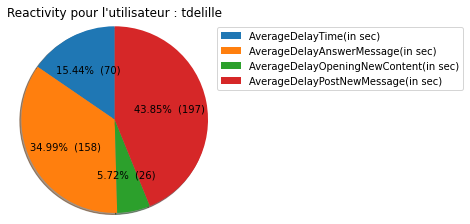

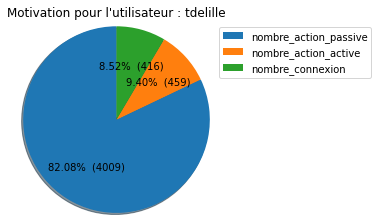

In [ ]:
print("Liste d'utilisateurs : ", usernames)

# Boucle du programme d'affichage
while(True):
    name = ""
    while(name not in usernames):
        name = input("Enter valid username: ") 
    displayIndicator(usersIndicators,'Reactivity',name)
    displayIndicator(usersIndicators,'Motivation',name)

### <span style="color:green; font-family:Georgia; font-size:1.5em;">END</span>

In [ ]:
#Eliot Lepoittevin
#Benjamin Riviere